In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

['coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', 'bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv']


Using TensorFlow backend.


In [2]:
data = pd.read_csv('../input/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')
data = data.dropna()
cl = data['Weighted_Price']
print(cl.head(5))

0       300.0
7       300.0
51      370.0
77      370.0
1436    377.0
Name: Weighted_Price, dtype: float64


In [3]:
scl = MinMaxScaler()
cl = cl.values.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

def processData(data, dataLength):
    X, Y = [], []
    for i in range(len(data)-dataLength-1):
        X.append(data[i:(i+dataLength), 0])
        Y.append(data[(i+dataLength), 0])
    return np.array(X), np.array(Y)
X, y = processData(cl, 7)
X_train, X_test = X[:int(X.shape[0]*0.8)], X[int(X.shape[0]*0.8):]
y_train, y_test = y[:int(y.shape[0]*0.8)], y[int(y.shape[0]*0.8):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1592546
398137
1592546
398137


In [5]:
model = Sequential()
model.add(LSTM(256, input_shape=(7, 1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), shuffle=False)

Train on 1592546 samples, validate on 398137 samples
Epoch 1/5
1592546/1592546 [==============================] - 1046s 657us/step - loss: 2.9216e-05 - val_loss: 0.0057
Epoch 2/5
1592546/1592546 [==============================] - 1052s 661us/step - loss: 4.4197e-05 - val_loss: 0.0054
Epoch 3/5
1592546/1592546 [==============================] - 1063s 667us/step - loss: 4.6290e-05 - val_loss: 0.0042
Epoch 4/5
1592546/1592546 [==============================] - 1040s 653us/step - loss: 3.1313e-05 - val_loss: 0.0027
Epoch 5/5
1592546/1592546 [==============================] - 1070s 672us/step - loss: 2.0301e-05 - val_loss: 0.0014


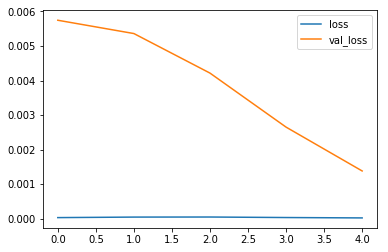

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

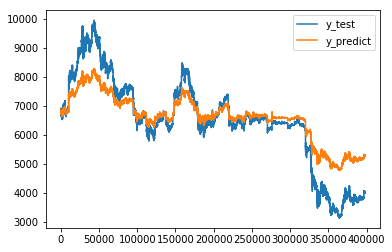

In [7]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1, 1)))
plt.plot(scl.inverse_transform(Xt))
plt.legend(['y_test', 'y_predict'])

In [8]:
print(X_test[249])
print(X_test[249].reshape(1, 7, 1))
X_prediction = model.predict(X_test[249].reshape([1, 7, 1]))
print('predictoin: {0}'.format(scl.inverse_transform(X_prediction)))
print('actual: {0}'.format(scl.inverse_transform(y_test[249].reshape(-1, 1))))

[[0.3359217 ]
 [0.33585446]
 [0.33606581]
 [0.33600454]
 [0.33587659]
 [0.33603001]
 [0.33620909]]
[[[0.3359217 ]
  [0.33585446]
  [0.33606581]
  [0.33600454]
  [0.33587659]
  [0.33603001]
  [0.33620909]]]
predictoin: [[6729.581]]
actual: [[6689.462719]]
